# Scraper for recipes (to migrate to EC2) 

In [47]:
import time
from urllib import urlencode  # TODO(Miles): Python 3
from selenium import webdriver
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from bs4 import BeautifulSoup
import random
import requests
import pymongo
import pandas as pd
import re
import pickle
import boto3
import os
import collections
from IPython.display import Image

In [48]:
%matplotlib inline

In [3]:
# Get list of 'recipe_ID's to scrape
recipes_orderedset = pickle.load(open('recipes_orderedset.pkl', 'rb'))

In [6]:
len(recipes_orderedset)

9782

In [49]:
# Access s3 bucket to use 
AWS_KEY = os.environ['AWS_ACCESS_KEY']
AWS_SECRET = os.environ['AWS_SECRET_ACCESS_KEY'] 

# Open s3 session with boto3
session = boto3.Session(aws_access_key_id=AWS_KEY, aws_secret_access_key=AWS_SECRET)
s3 = session.resource('s3')

mybucket = s3.Bucket('ohailolcat')

In [50]:
mybucket.upload_file?

In [58]:
# Use Firefox as browser
browser = webdriver.Firefox(firefox_binary=FirefoxBinary(
    firefox_path='/Applications/FirefoxESR.app/Contents/MacOS/firefox'
))

In [59]:
N = 7

In [60]:
I = 0

In [61]:
offset = N * 1000 + I 

In [62]:
offset

7000

In [63]:
for i, a in enumerate(recipes_orderedset.keys()[offset:N*1000+1000]):
    browser.get("http://allrecipes.com/recipe/{}/".format(a))
    print "list item number {}, {} \n  {}\n\n\n".format(i+offset, a, browser.current_url)
#    browser.execute_script("window.scrollTo(0, document.body.scrollHeight/1.2);")
    time.sleep(2 + random.random() * 5)
#     browser.save_screenshot('temp.png') 
#     mybucket.upload_file('temp.png', 'recipes{}/recipe_{}.png'.format(str(N),a))
    with open("temp.pkl", 'wb') as f: pickle.dump(browser.page_source, f)
    mybucket.upload_file('temp.pkl', 'recipes{}/recipe_{}.pkl'.format(str(N),a))
    I = i 
    

list item number 7000, 12577 
  http://allrecipes.com/recipe/12577/chocolate-pecan-pie-iii/



list item number 7001, 228565 
  http://allrecipes.com/recipe/228565/breakfast-monkey-bread/



list item number 7002, 145409 
  http://allrecipes.com/recipe/145409/greek-tzatziki/



list item number 7003, 16059 
  http://allrecipes.com/recipe/16059/stole-my-heart-chocolate-cake/



list item number 7004, 239261 
  http://allrecipes.com/recipe/239261/triple-citrus-cupcakes/



list item number 7005, 16504 
  http://allrecipes.com/recipe/16504/bacon-cheese-puffs/



list item number 7006, 111515 
  http://allrecipes.com/recipe/111515/quinoa-with-chickpeas-and-tomatoes/



list item number 7007, 245197 
  http://allrecipes.com/recipe/245197/cheesy-chorizo-and-egg-sweet-potato-boats/



list item number 7008, 245190 
  http://allrecipes.com/recipe/245190/sauerbraten-beef-in-gingersnap-gravy/



list item number 7009, 223272 
  http://allrecipes.com/recipe/223272/herbs-de-provence/



list item 

In [67]:
personal_recipes = [a for a in recipes_orderedset.keys() if int(a) > 1000000]

In [64]:
N = p

In [72]:
offset = 600

In [73]:
for i, a in enumerate(personal_recipes[offset:offset+100]):
    browser.get("http://allrecipes.com/personal-recipe/{}/".format(a))
    print "list item number {}, {} \n  {}\n\n\n".format(i+offset, a, browser.current_url)
#    browser.execute_script("window.scrollTo(0, document.body.scrollHeight/1.2);")
    time.sleep(2 + random.random() * 5)
#     browser.save_screenshot('temp.png') 
#     mybucket.upload_file('temp.png', 'recipes{}/recipe_{}.png'.format(str(N),a))
    with open("temp.pkl", 'wb') as f: pickle.dump(browser.page_source, f)
    mybucket.upload_file('temp.pkl', 'recipes{}/recipe_{}.pkl'.format(str(N),a))
    I = i 
    

list item number 600, 64559266 
  http://allrecipes.com/personal-recipe/64559266/paleo-bread/



list item number 601, 64084101 
  http://allrecipes.com/personal-recipe/64084101/banana-peanut-butter-muffins/



list item number 602, 64629117 
  http://allrecipes.com/personal-recipe/64629117/rons-chili/



list item number 603, 64080820 
  http://allrecipes.com/personal-recipe/64080820/stuffed-peppers-with-yogurt-sauce-indian/



list item number 604, 64425742 
  http://allrecipes.com/personal-recipe/64425742/grape-leaves-aleppo/



list item number 605, 64081717 
  http://allrecipes.com/personal-recipe/64081717/potatoes-and-peas-in-red-curry-sauce-thai/



list item number 606, 62992868 
  http://allrecipes.com/personal-recipe/62992868/big-bad-biker-banana-bread/



list item number 607, 64556689 
  http://allrecipes.com/personal-recipe/64556689/chicken-marsala/



list item number 608, 64604321 
  http://allrecipes.com/personal-recipe/64604321/slow-cooker-corn-chowder/



list item nu

In [74]:
browser.quit()

In [29]:
pwd

u'/Users/User1/DS/projects/food/src/data'

In [30]:
ls

__init__.py                        recipe_16073.pkl
aboutme.pkl                        recipe_16073.png
aboutme2.pkl                       recipe_228056.pkl
aboutme_page.ipynb                 recipe_228056.png
favorites_page.ipynb               recipe_23998.png
followers_page.ipynb               recipe_241213.pkl
following_page.ipynb               recipe_241213.png
geckodriver.log                    recipe_scrape_list.ipynb
lookit.py                          recipe_scraper-localmachine.ipynb
madeit_page.ipynb                  recipes_orderedset.pkl
mem.py                             reviews_page.ipynb
members.py                         scrape_for_reviews.py
memlist.txt                        scrape_for_reviews.pyc
ndb_to_mongo.py                    txt_to_mongo.py
ndb_to_mongo.pyc                   ubuntu@54.202.196.138
non-allrecipe reviews.ipynb        usda_food_items.ipynb


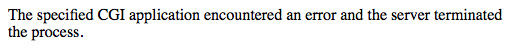

In [24]:
Image("temp.png")

In [27]:
mybucket

s3.Bucket(name='ohailolcat')